In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Datasets/rice-240.csv')

In [3]:
df.head()

,Month,Price,Change
0,Feb 2000,10510.70,-
1,Mar 2000,9840.12,-6.38 %
2,Apr 2000,9371.48,-4.76 %
3,May 2000,8732.53,-6.82 %
4,Jun 2000,8759.43,0.31 %


In [4]:
df['Month'] = df['Month'].apply(pd.to_datetime)

In [5]:
df.head()

,Month,Price,Change
0,2000-02-01,10510.70,-
1,2000-03-01,9840.12,-6.38 %
2,2000-04-01,9371.48,-4.76 %
3,2000-05-01,8732.53,-6.82 %
4,2000-06-01,8759.43,0.31 %


In [6]:
del df['Change']

In [7]:
df.head()

,Month,Price
0,2000-02-01,10510.70
1,2000-03-01,9840.12
2,2000-04-01,9371.48
3,2000-05-01,8732.53
4,2000-06-01,8759.43


In [8]:
df.set_index('Month',inplace = True)

In [9]:
df.head()

,Price
Month,
2000-02-01,10510.70
2000-03-01,9840.12
2000-04-01,9371.48
2000-05-01,8732.53
2000-06-01,8759.43


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

/home/nns/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


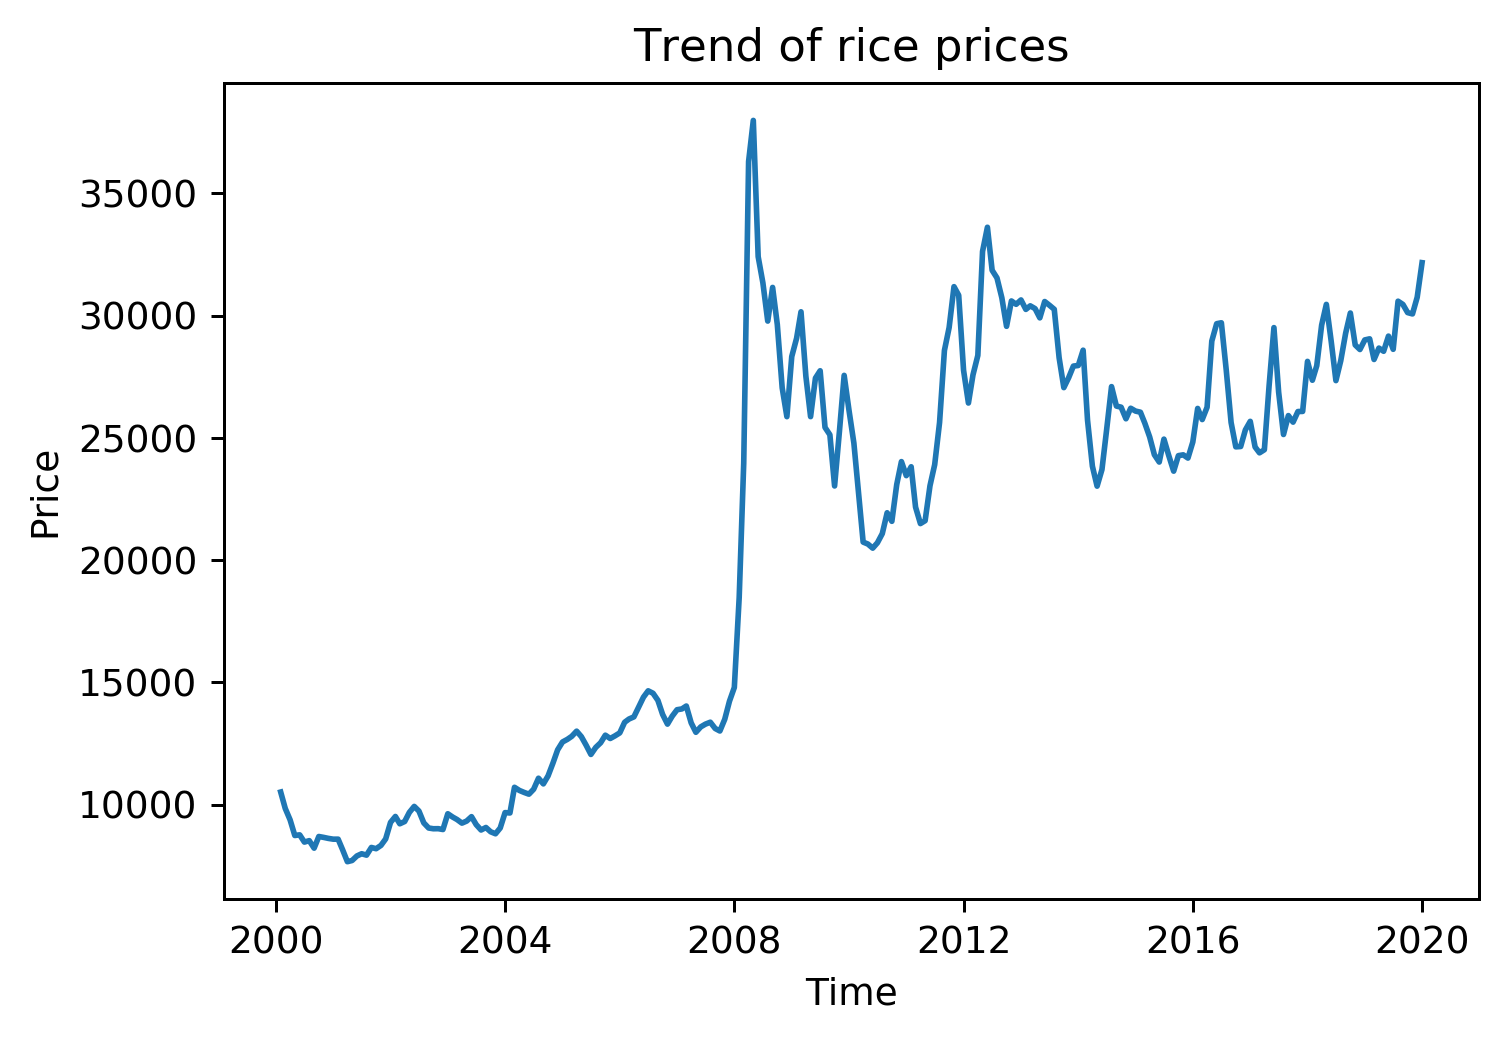

In [11]:
plt.figure(dpi = 270)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title('Trend of rice prices')
sns.lineplot(data = df['Price'])


In [12]:
df = df.resample("M").mean()

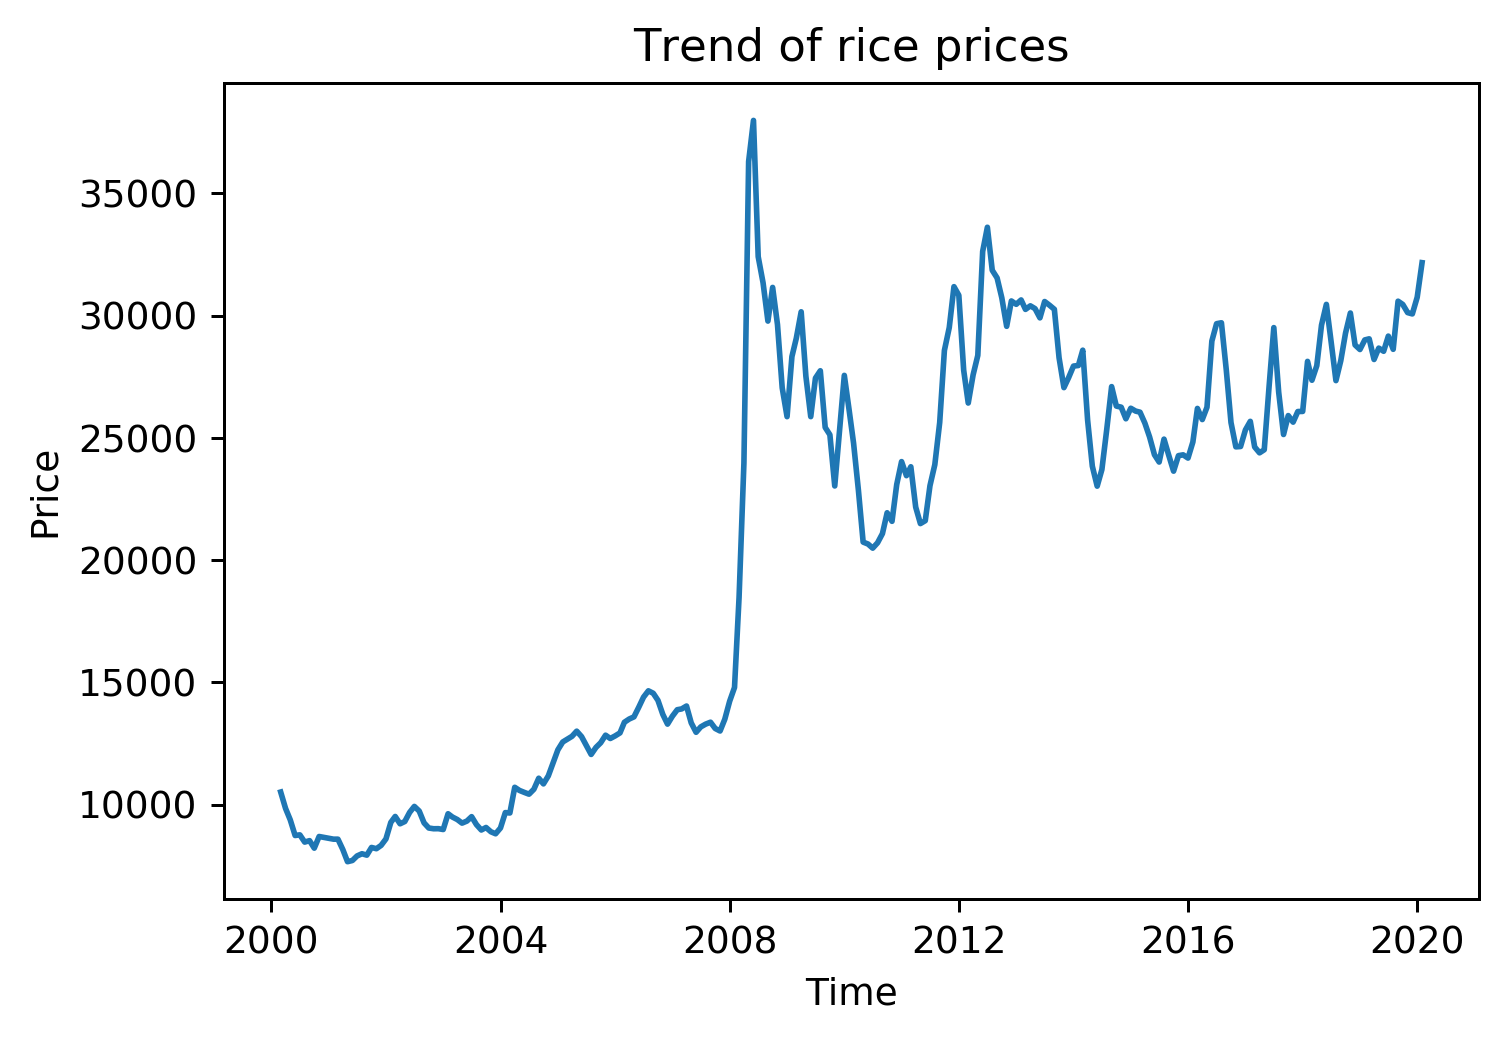

In [13]:
plt.figure(dpi = 270)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title('Trend of rice prices')
sns.lineplot(data = df['Price'])

In [14]:
df

,Price
Month,
2000-02-29,10510.70
2000-03-31,9840.12
2000-04-30,9371.48
2000-05-31,8732.53
2000-06-30,8759.43
...,...
2019-09-30,30459.47
2019-10-31,30126.00
2019-11-30,30071.64


In [15]:
values = df.values

In [16]:
values = values.astype('float32')

In [17]:
values

array([[10510.7 ],
       [ 9840.12],
       [ 9371.48],
       [ 8732.53],
       [ 8759.43],
       [ 8463.06],
       [ 8521.52],
       [ 8214.13],
       [ 8691.34],
       [ 8654.72],
       [ 8613.79],
       [ 8581.98],
       [ 8582.74],
       [ 8158.59],
       [ 7661.19],
       [ 7709.92],
       [ 7896.88],
       [ 7985.82],
       [ 7929.  ],
       [ 8242.76],
       [ 8192.29],
       [ 8327.54],
       [ 8592.97],
       [ 9268.37],
       [ 9510.91],
       [ 9211.76],
       [ 9304.49],
       [ 9677.5 ],
       [ 9922.95],
       [ 9733.28],
       [ 9248.23],
       [ 9039.11],
       [ 9008.81],
       [ 9011.67],
       [ 8977.64],
       [ 9621.95],
       [ 9487.49],
       [ 9385.29],
       [ 9238.61],
       [ 9322.47],
       [ 9503.05],
       [ 9177.56],
       [ 8957.42],
       [ 9060.05],
       [ 8885.18],
       [ 8803.57],
       [ 9038.41],
       [ 9669.27],
       [ 9654.18],
       [10704.51],
       [10576.95],
       [10496.17],
       [1042

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler(feature_range=[0,1])
scaled = scaler.fit_transform(values)
scaled = pd.DataFrame(scaled)

In [19]:
scaled.head()

,0
0,0.093958
1,0.071846
2,0.056394
3,0.035326
4,0.036213


In [20]:
train_sample = int(len(df)*0.8)

In [21]:
train = values[:train_sample,:]

In [22]:
test = values[train_sample:,:]

In [23]:
xtrain ,ytrain = train[:,:-1],train[:,-1]
xtest, ytest = test[:,:-1],test[:,-1]

In [24]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(192, 0) (192,) (48, 0) (48,)


In [25]:
xtrain = xtrain.reshape((xtrain.shape[0],1,xtrain.shape[1]))
xtest = xtest.reshape((xtest.shape[0],1,xtest.shape[1]))

In [26]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(192, 1, 0) (192,) (48, 1, 0) (48,)


In [27]:
import tensorflow as tf

In [42]:
model_lstm = tf.keras.Sequential()

In [43]:
model_lstm.add(tf.keras.layers.LSTM(10,return_sequences=True,input_shape=(xtrain.shape[1],xtrain.shape[2])))
#model_lstm.add(tf.keras.layers.LSTM(units = 30,return_sequences  = True))
#model_lstm.add(tf.keras.layers.LSTM(units = 30))
model_lstm.add(tf.keras.layers.Dense(units = 5))



model_lstm.compile(loss = "mae",optimizer = "adam")
model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 1, 10)             440       
_________________________________________________________________
dense_4 (Dense)              (None, 1, 5)              55        
Total params: 495
Trainable params: 495
Non-trainable params: 0
_________________________________________________________________


In [44]:
history_lstm = model_lstm.fit(xtrain,ytrain,epochs = 10,validation_data = (xtest,ytest),shuffle = False)

Train on 192 samples, validate on 48 samples
Epoch 1/10
192/192 [==============================] - 1s 7ms/sample - loss: 18789.5155 - val_loss: 27840.8971
Epoch 2/10
192/192 [==============================] - 0s 130us/sample - loss: 18789.5109 - val_loss: 27840.8900
Epoch 3/10
192/192 [==============================] - 0s 145us/sample - loss: 18789.5024 - val_loss: 27840.8841
Epoch 4/10
192/192 [==============================] - 0s 160us/sample - loss: 18789.4945 - val_loss: 27840.8763
Epoch 5/10
192/192 [==============================] - 0s 168us/sample - loss: 18789.4854 - val_loss: 27840.8633
Epoch 6/10
192/192 [==============================] - 0s 204us/sample - loss: 18789.4775 - val_loss: 27840.8594
Epoch 7/10
192/192 [==============================] - 0s 190us/sample - loss: 18789.4676 - val_loss: 27840.8509
Epoch 8/10
192/192 [==============================] - 0s 184us/sample - loss: 18789.4616 - val_loss: 27840.8385
Epoch 9/10
192/192 [==============================] - 0s 178u

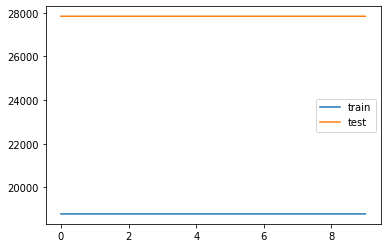

In [45]:
plt.plot(history_lstm.history['loss'],label = 'train')
plt.plot(history_lstm.history['val_loss'],label = 'test')
plt.legend()
plt.show()

In [46]:
df = pd.read_csv('Datasets/rice-240.csv')

In [47]:
df.head()

,Month,Price,Change
0,Feb 2000,10510.70,-
1,Mar 2000,9840.12,-6.38 %
2,Apr 2000,9371.48,-4.76 %
3,May 2000,8732.53,-6.82 %
4,Jun 2000,8759.43,0.31 %


In [49]:
del df['Month']

In [50]:
del df['Change']

In [51]:
df.head()

,Price
0,10510.70
1,9840.12
2,9371.48
3,8732.53
4,8759.43


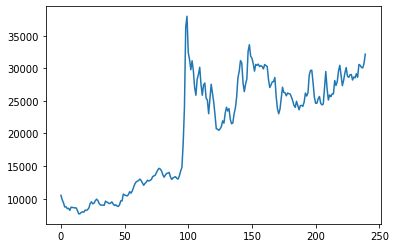

In [52]:
sns.lineplot(data = df['Price'])

In [53]:
from sklearn import linear_model

In [54]:
import numpy as np

In [58]:

from sklearn.preprocessing import PolynomialFeatures
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]



In [65]:
poly = PolynomialFeatures(degree=1)

In [66]:
train.index

Int64Index([  0,   1,   2,   4,   5,   6,   8,   9,  10,  11,
            ...
            228, 229, 230, 232, 233, 234, 235, 236, 237, 239],
           dtype='int64', length=197)

In [70]:
train_x = np.asanyarray(train.index).reshape(-1,1)
train_y = np.asanyarray(train['Price']).reshape(-1,1)

test_x = np.asanyarray(test.index).reshape(-1,1)
test_y = np.asanyarray(test['Price']).reshape(-1,1)

In [72]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[  0.         102.81461295]]
Intercept:  [8262.25966966]


In [71]:
train_x_poly = poly.fit_transform(train_x)

Text(0, 0.5, 'Price')

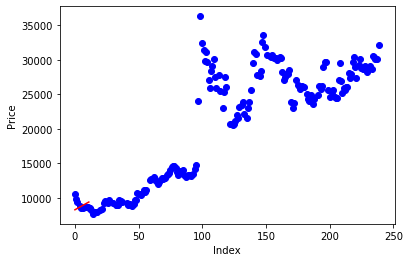

In [76]:
plt.scatter(train.index, train.Price,  color='blue')
XX = np.arange(0.0, 11.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX
plt.plot(XX, yy, '-r' )
plt.xlabel("Index")
plt.ylabel("Price")

